In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress

import os

In [7]:
species

array(['CA', 'BT', 'BU', 'BV', 'CS', 'CD', 'DP', 'CH'], dtype=object)

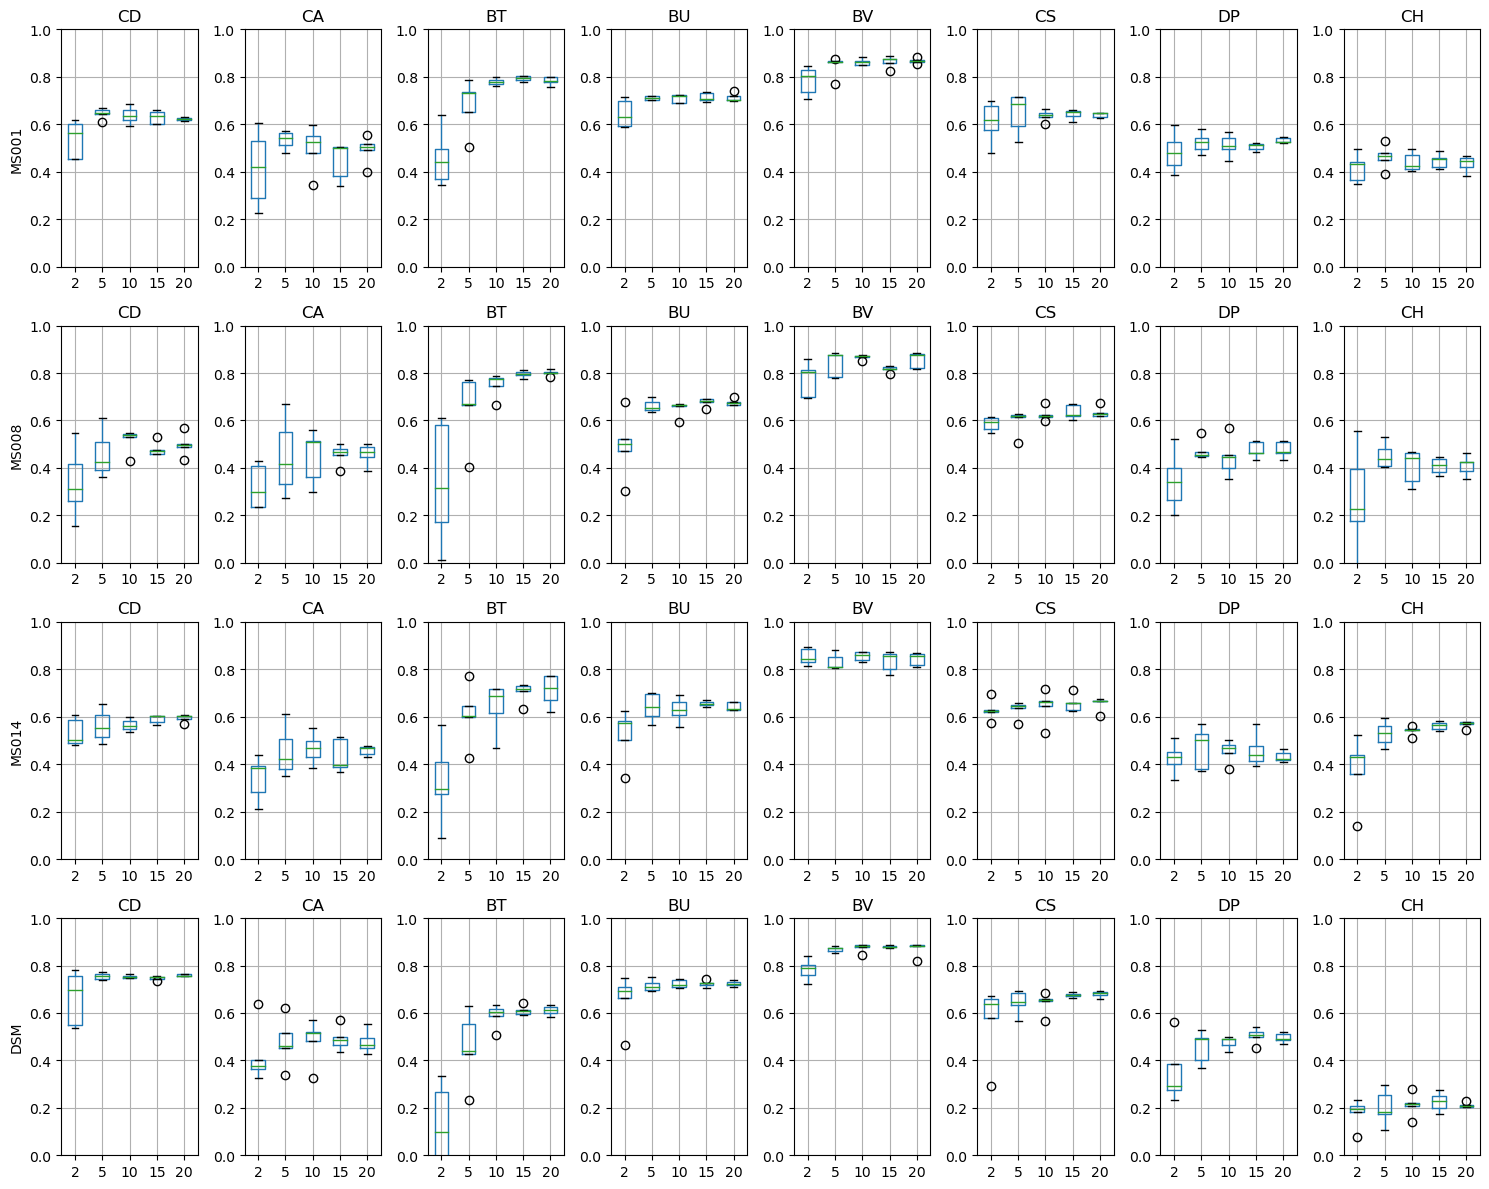

In [19]:
# define species 
species = ['CD', 'CA', 'BT', 'BU', 'BV', 'CS', 'DP', 'CH']

# define list of kfold sizes 
n_splits_list = [2, 5, 10, 15, 20]

# number of trials
n_trials = 5

# strains 
strains = ['MS001', 'MS008', 'MS014', 'DSM']

strain_dict = {}
for strain in strains:
    strain_dict[strain] = pd.DataFrame()

# subplot index
k = 1
plt.figure(figsize=(15, 12))
    
# run kfold for each file 
for i, strain in enumerate(strains):
    
    # for each species 
    for j, sp in enumerate(species):
        
        # save data to dataframe
        df = pd.DataFrame()
    
        for n_splits in n_splits_list:
            
            # save r values
            r_vals = []
            
            for trial in range(n_trials):

                # load kfold results
                kfold_df = pd.read_csv(f"kfold/{strain}_{n_splits}_fold_trial_{trial}.csv")

                all_pred_species = kfold_df['species'].values
                all_true = kfold_df['true'].values 
                all_pred = kfold_df['pred'].values
                all_stdv = kfold_df['stdv'].values

                # show prediction performance of individual species
                sp_inds = all_pred_species == sp
                r_vals.append(linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue)

            # save to dataframe
            df[n_splits] = r_vals
            
        # save dataframe
        df.to_csv(f"sensitivity/{strain}_{sp}.csv", index=False)
            
        # plot
        plt.subplot(4,8,k)
        k += 1
        df.boxplot()
        if j == 0:
            plt.ylabel(strain)
        plt.title(f"{sp}")
        plt.ylim([0, 1])
        # plt.xlabel("K-fold")
        #plt.ylabel("Pearson correlation")
        # plt.show()
plt.tight_layout()
plt.savefig("sensitivity/sensitivity_boxplot.png", dpi=300)
plt.show()